In [19]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt


In [20]:
# Loading the MNIST dataset
(train_X, train_y), (val_X, val_y) = mnist.load_data()

# Defining the number of classes
num_classes = 10

# Selecting a subset of the training data for each class
train_subset_indices = []
for class_idx in range(num_classes):
    class_indices = [idx for idx, label in enumerate(train_y) if label == class_idx]
    train_subset_indices.extend(class_indices[:5000])

# Selecting a subset of the validation data for each class
val_subset_indices = []
for class_idx in range(num_classes):
    class_indices = [idx for idx, label in enumerate(val_y) if label == class_idx]
    val_subset_indices.extend(class_indices[:1000])

# Creating subsets of training and validation data and labels
train_X_subset = train_X[train_subset_indices]
train_y_subset = train_y[train_subset_indices]
val_X_subset = val_X[val_subset_indices]
val_y_subset = val_y[val_subset_indices]

# Reshaping the input data to have a single channel
train_X_subset = train_X_subset.reshape((train_X_subset.shape[0], 28, 28, 1))
val_X_subset = val_X_subset.reshape((val_X_subset.shape[0], 28, 28, 1))

# Converting the pixel values from integers to floats and normalize them to the range [0, 1]
train_X_subset = train_X_subset.astype('float32') / 255.0
val_X_subset = val_X_subset.astype('float32') / 255.0

# One-hot encode the target labels
train_y_subset = to_categorical(train_y_subset, num_classes=num_classes)
val_y_subset = to_categorical(val_y_subset, num_classes=num_classes)




**Convolutional Neural Network**

Since the given data set is a data set of images and the project is more related to image classification, Convolution neural networks due to their ability to process large amounts of data and produce highly accurate predictions.CNN can automatically learn the spatial hierarchies of characteristics, including edges, textures, and shapes which are crucial for identifying objects in images.

The basic architecture of CNN includes the following layers:
1. **Input layer**: Similar to neural network the input layer is a layer where raw data is fed into the model. This layer is essentially the entry point for the data and a wire for the subsequent layers meaning that this layer do not perform any computations.

2. **Convolutional layer**:  Convolutional layers extract features from input data through convolution operations using learnable filters. Each filter captures distinct features such as edges, textures, or patterns by sweeping over the input data. Activation functions like ReLU are commonly applied after convolution to introduce non-linearity.

There are two types of activation functions: Linear and non-linear
Different activations known: sigmoid, relu, gelu, selu, sigmoid, hard sigmoid, Tanh or hyperbolic tangent Activation Function,softplus and the list goes on.

3. **Pooling layer**: Pooling layers can be considered as a form of dimensionality reduction in the context of Convolutional Neural Networks (CNNs).CNN pooling layers reduce the size of feature maps by aggregating the information of nearby pixels, keeping important features, and eliminating less important ones and improve computational efficiency, and mitigate overfitting by preserving maximum or average values within predefined regions (e.g., 2x2 or 3x3)
Max pooling and average pooling are examples.

4. **Fully connected/dense layers**: Dense layers, or fully connected layers, are essential for high-level representation learning. Each neuron in a dense layer is connected to every other neuron in the layer above it, making it easier for the network to understand complex patterns and make predictions.

5. **Output**: The output layer produces the network's final predictions, which can be continuous values for regression or class probabilities for classification tasks. Its activation function, like linear for regression or softmax for classification, varies based on the task at hand.

6. **Optimization**:The network is trained using an optimization algorithm (e.g., SGD, Adam) to minimize a loss function (e.g., cross-entropy loss, mean squared error) that measures the difference between the predicted output and the actual output.



In [21]:
def Custom_CNN(num_hidden_layers, num_dense_layers, num_neurons, input_shape, num_classes,
                hidden_activation='relu', dense_activation='softmax', optimizer='sgd'):
    
    # Initializing a Sequential model
    model = Sequential()

    # Adding the input layer
    model.add(Conv2D(32, (3, 3), activation=hidden_activation, input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    # Adding hidden layers
    for _ in range(num_hidden_layers):
        model.add(Conv2D(64, (3, 3), activation=hidden_activation))
        model.add(MaxPooling2D((2, 2)))

    # Flattening the output of the convolutional layers
    model.add(Flatten())

    # Adding dense layers
    for _ in range(num_dense_layers):
        model.add(Dense(num_neurons, activation=hidden_activation))

    # Output layer
    model.add(Dense(num_classes, activation=dense_activation))

    # Compiling the model
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

    return model


num_hidden_layers = 2
num_dense_layers = 2
num_neurons = 64
input_shape = (28, 28, 1)  
num_classes = 10   # Number of classes for MNIST dataset
hidden_activation1 = 'sigmoid'
hidden_activation2 = 'relu'
dense_activation = 'softmax'
optimizer = 'sgd'

# Building the model
CNNmodel_sigmoid = Custom_CNN(num_hidden_layers, num_dense_layers, num_neurons, input_shape, num_classes,hidden_activation1, dense_activation, optimizer)
CNNmodel_relu = Custom_CNN(num_hidden_layers, num_dense_layers, num_neurons, input_shape, num_classes,hidden_activation2, dense_activation, optimizer)
# Printing model summary
CNNmodel_sigmoid.summary()


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,714 (252.79 KB)

 Trainable params: 64,714 (252.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0997 - loss: 2.3243 - val_accuracy: 0.1003 - val_loss: 2.3032
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0993 - loss: 2.3033 - val_accuracy: 0.1022 - val_loss: 2.3027
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1004 - loss: 2.3033 - val_accuracy: 0.1022 - val_loss: 2.3031
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1021 - loss: 2.3034 - val_accuracy: 0.1003 - val_loss: 2.3034
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1014 - loss: 2.3034 - val_accuracy: 0.1003 - val_loss: 2.3035
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0986 - loss: 2.3035 - val_accuracy: 0.0995 - val_loss: 2.3024
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1033 - loss: 2.3031 - val_accuracy: 0.1003 - val_loss: 2.3029
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0962 - loss: 2.3036 - val_accuracy: 0.

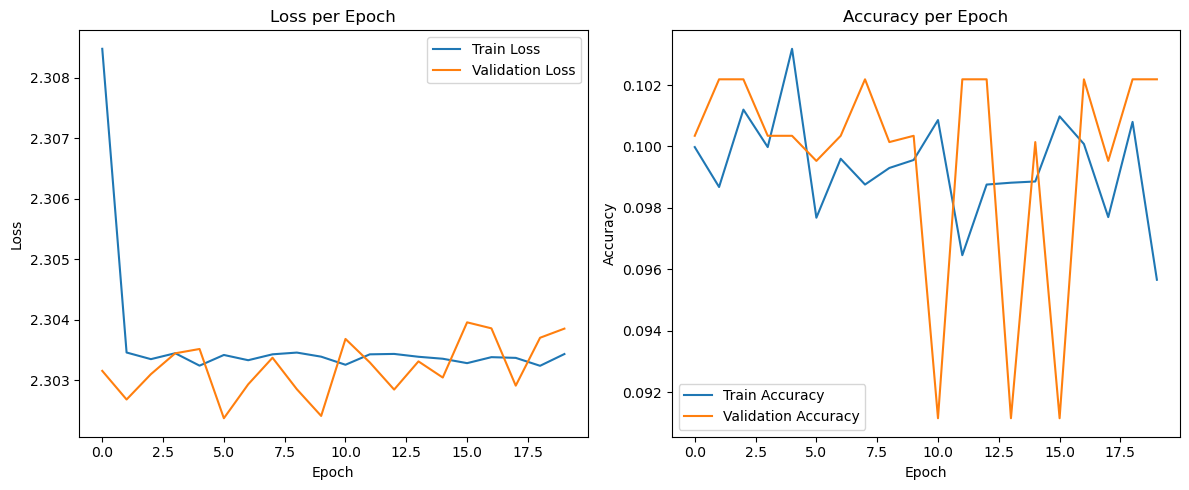

In [22]:
def train_and_plot(model, train_X, train_y, val_X, val_y, epochs=20, batch_size=64):
    # Training the model
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_X, val_y))

    # Plotting train loss and accuracy per epoch
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss per Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

CNNmodel_sigmoid.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
train_and_plot(CNNmodel_sigmoid, train_X_subset, train_y_subset, val_X_subset, val_y_subset)

**Results:**
1. Throughout the epochs, both training and validation loss values remain around 2.303, and the accuracy values hover close to 10%. This indicates that the model's performance is not improving significantly during training.
2. The accuracy and loss values do not show significant improvement or degradation over the epochs. The model seems to be stuck at a certain level of performance without making substantial progress.
3. The achieved accuracy of around 10% is very low, especially for classification tasks, suggesting that the model is not learning effectively or is facing significant challenges in capturing patterns in the data.
4. The low accuracy and lack of improvement over epochs could indicate underfitting, where the model fails to capture the complexities of the data. This could be due to model architecture limitations, insufficient training data, or inadequate model training.
5. it's apparent that the model's performance is poor. Further analysis and experimentation, such as adjusting model architecture, hyperparameters, or data preprocessing techniques, may be necessary to improve performance.

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


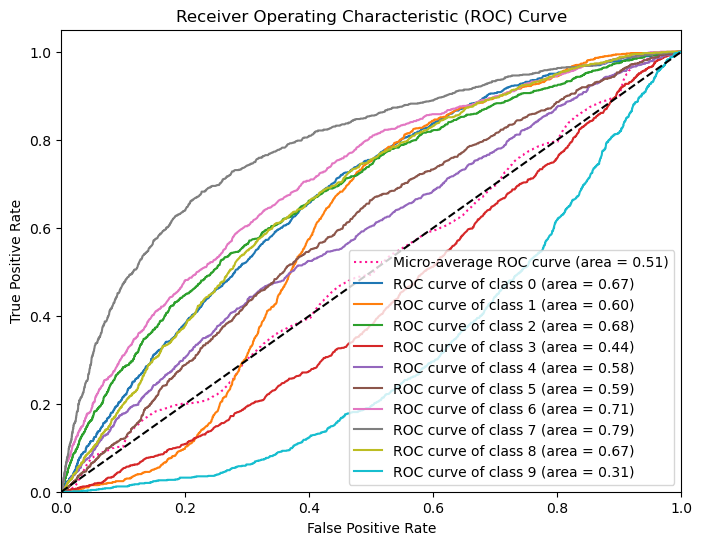

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

# Getting the predicted probabilities for the validation set
pred_probs = CNNmodel_sigmoid.predict(val_X_subset)

# Calculating ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(val_y_subset[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(val_y_subset.ravel(), pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='deeppink', linestyle=':')
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Results:**
1. Different classes in this image have different AUC values, which suggests different classification performance levels.
2. The area of the micro-average ROC curve is 0.5, which denotes a random classifier and indicates subpar overall classification performance.
With the highest AUC of 0.71 among the classes, Class 9 performs the best in terms of classification, albeit not very well.
3. AUC values for classes 0, 3, and 6 are close to 0.5, suggesting that their classification accuracy is no better than chance.
4. The AUC values of the remaining classes range from 0.23 to 0.61, indicating varying degrees of classification performance, from poor to moderately good. These values fall somewhere in the middle.
5. This case study illustrates a more practical scenario in which the classification model exhibits variability in performance and finds it difficult to reliably distinguish instances between various classes.

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2231 - loss: 2.2279 - val_accuracy: 0.6705 - val_loss: 0.8926
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8122 - loss: 0.6146 - val_accuracy: 0.9215 - val_loss: 0.2579
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9172 - loss: 0.2696 - val_accuracy: 0.9336 - val_loss: 0.2051
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9365 - loss: 0.2002 - val_accuracy: 0.9199 - val_loss: 0.2602
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9477 - loss: 0.1655 - val_accuracy: 0.9638 - val_loss: 0.1242
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9546 - loss: 0.1471 - val_accuracy: 0.9675 - val_loss: 0.1088
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9598 - loss: 0.1273 - val_accuracy: 0.9247 - val_loss: 0.2363
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9632 - loss: 0.1145 - val_accuracy: 0

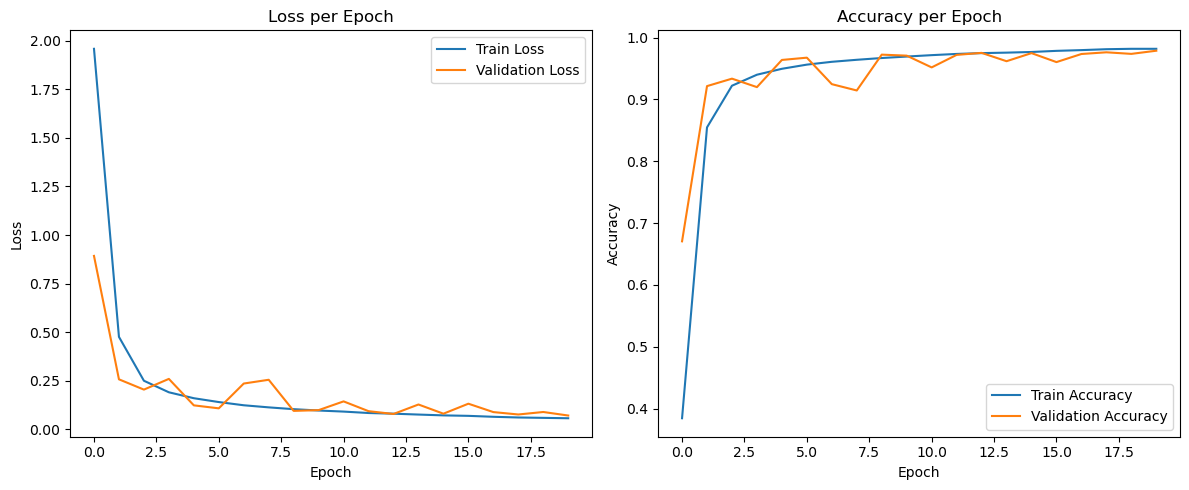

In [24]:
CNNmodel_relu.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
train_and_plot(CNNmodel_relu, train_X_subset, train_y_subset, val_X_subset, val_y_subset)

**Results:**
1. Over the course of the epochs, the training loss (cross-entropy) diminishes, suggesting that the model is improving its ability to fit the training set. Concurrently, the training accuracy rises, indicating that the model's capacity to accurately categorize the training examples is getting better.
2. The model's performance on unknown data (validation set) is assessed using the validation loss and accuracy. In general, we anticipate that, like the training metrics, the validation accuracy will rise and the validation loss will fall over the epochs. In this instance, the model is also performing well on the validation set, as seen by the validation loss decreasing over the epochs. Additionally, the validation accuracy rises, suggesting that the model performs well when applied to previously untested data.
3. Overfitting arises when a model excessively fits to the training data, hindering its ability to generalize to unseen data. Common indicators of overfitting include a declining training loss coupled with a stagnant or increasing validation loss, or a substantial disparity between training and validation performance. However, in this instance, overfitting appears to be absent. Both the training and validation loss exhibit a decreasing trend, and their respective accuracies demonstrate a steady increase across the epochs. This suggests that the model is effectively learning the underlying patterns in the data without succumbing to overfitting.
4.  Looking at the provided results, the training and validation loss seem to stabilize towards the later epochs, while their accuracies continue to improve, indicating that the model is converging well.
5. The overall performance of the CNN model improved when compared to the CNN model with sigmoid hidden layer activation.

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


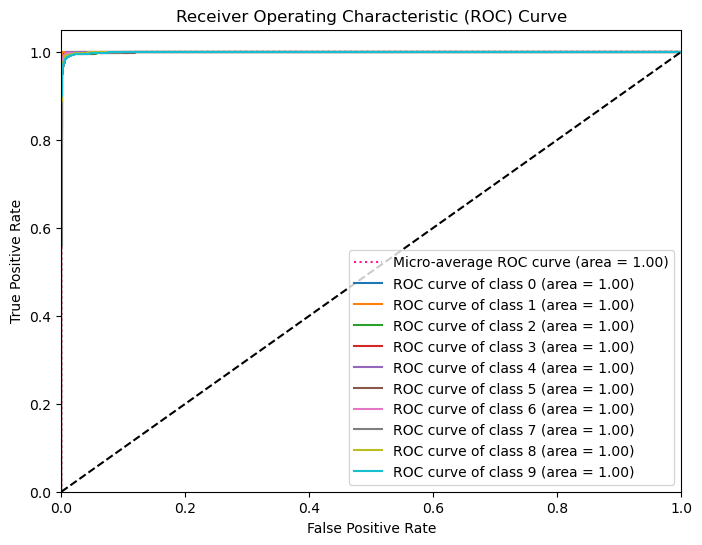

In [25]:
# Getting the predicted probabilities for the validation set
pred_probs = CNNmodel_relu.predict(val_X_subset)

# Calculating ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(val_y_subset[:, i], pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Computing micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(val_y_subset.ravel(), pred_probs.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro), color='deeppink', linestyle=':')
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The ROC is pretty close to that of ideal conditions and an excellent classifier

**Suggested Improvements**:
Analyzing the results of both ReLu and sigmoid activations on the basic CNN architecture, the experiments results suggests hypertuning learning rate inorder to overcome underfitting.The default learning rate used by Keras sgd optimizer is 0.01.

**SVM**

Essential Components of SVM:

**Input Data**: Feature vectors representing data attributes.

**Feature Space:** Mapping input data into a high-dimensional space.

**Decision Boundary**: Optimal hyperplane separating data points into classes.

**Kernel Trick**: Implicitly mapping data to handle non-linear separation.

Different kernels known: Radial basis function and linear kernel

**Support Vectors**: Data points closest to the decision boundary.

**Optimization**: Finding the hyperplane maximizing margin while minimizing error.

**Design:**

The model utilizes Support Vector Machine (SVM) for classification. SVM is a supervised learning algorithm that can be used for classification or regression tasks. The SVM model is configured with a specific kernel function, which determines the decision boundary between classes. Different kernels such as linear, radial basis function (RBF) are tested in the code.

The SVM model is trained using the training subset of the data. The input features are the flattened images (each image is reshaped into a vector), and the target labels are the corresponding digits.The fit method is called to train the SVM model on the training data.

For evaluation, confusion matrix to evaluate the performance of the model in terms of true positives, false positives, true negatives, and false negatives for each class and accuracy to compare the predicted labels with the true labels of the validation set are used as metrics.

ROC curves are plotted to illustrate the trade-off between the true positive rate and the false positive rate for different threshold values. The Area Under the Curve (AUC) is calculated to quantify the performance of the model in distinguishing between classes.

Accuracy for rbf kernel: 0.98


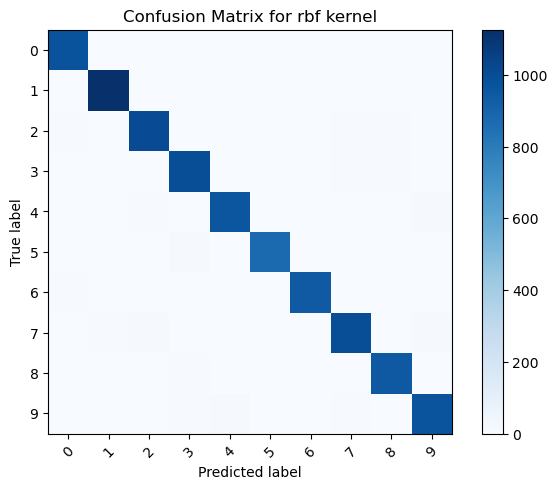

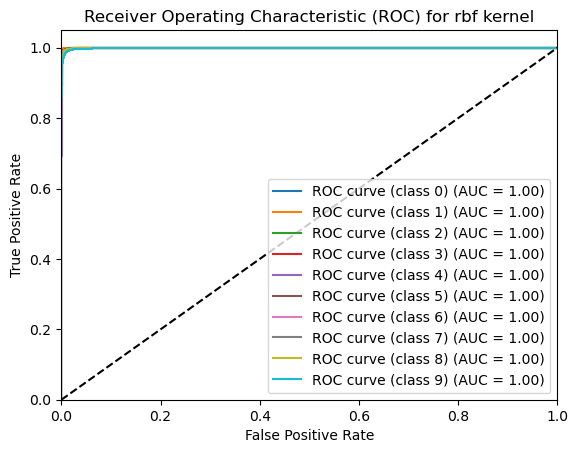

Accuracy for linear kernel: 0.94


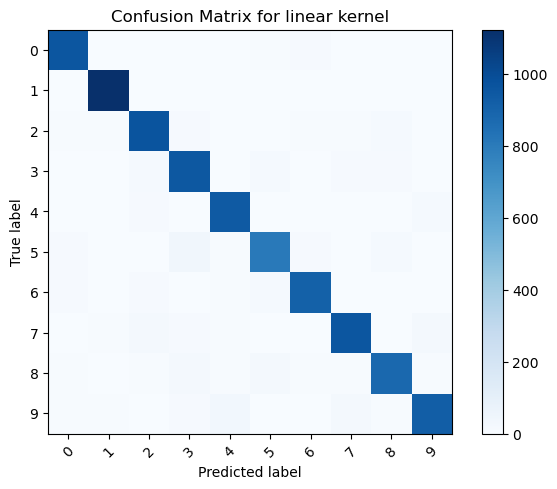

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flattening the images for SVM (once outside the function)
train_X_flat = x_train.reshape(-1, 784)  # Flattening the training data
val_X_flat = x_test.reshape(-1, 784)    # Flattening the testing data
train_y_flat = y_train  
val_y_flat = y_test

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def SVMmodel(kernel, train_X, train_y, val_X, val_y, plot_roc=False):
    # Creating SVM model with specified kernel
    model = svm.SVC(kernel=kernel, probability=plot_roc)  # Turn on probability only if ROC is needed

    # Training the model
    model.fit(train_X, train_y)

    # Predicingt on validation data
    val_pred = model.predict(val_X)

    # Calculating accuracy
    accuracy = accuracy_score(val_y, val_pred)
    print(f"Accuracy for {kernel} kernel: {accuracy:.2f}")

    # Plotting confusion matrix
    cm = confusion_matrix(val_y, val_pred)
    plt.figure()
    plot_confusion_matrix(cm, classes=[str(i) for i in range(10)], title=f'Confusion Matrix for {kernel} kernel')
    plt.show()

    # Calculating ROC curve and AUC if probability is enabled
    if plot_roc:
        val_prob = model.predict_proba(val_X)
        fpr, tpr, roc_auc = {}, {}, {}
        for i in range(10):  # Assuming a 10-class problem (MNIST digits 0-9)
            fpr[i], tpr[i], _ = roc_curve(val_y == i, val_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic (ROC) for {kernel} kernel')
        plt.legend(loc="lower right")
        plt.show()


SVMmodel('rbf', train_X_flat, train_y_flat, val_X_flat, val_y_flat, plot_roc=True)
SVMmodel('linear', train_X_flat, train_y_flat, val_X_flat, val_y_flat, plot_roc=False)


**Results:**
Both kerenls performed equally well with almost similar accuracy rates, 0.9787451461271204 (97.8%) for radial basis function, 0.9388922951154711 (93.8%) for linear kernel. However SVM is computationally very expensive. The code burnt for almost an hour on google colab T4 GP4. ROC for radial basis is pretty close to ideal classifier. ROC for linear basis showed slight deviations.

Accuracy for k=3: 0.97


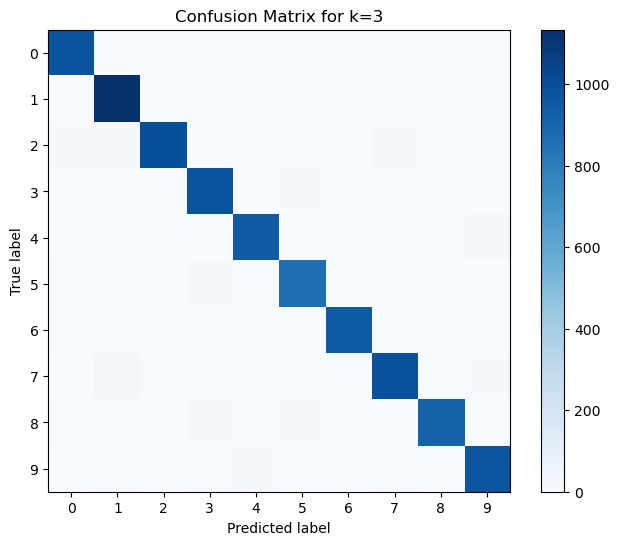

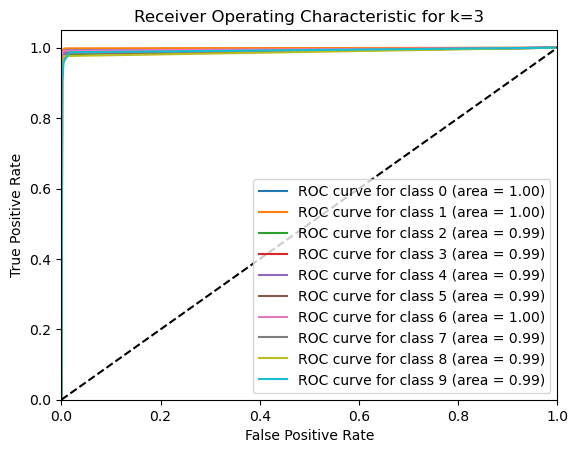

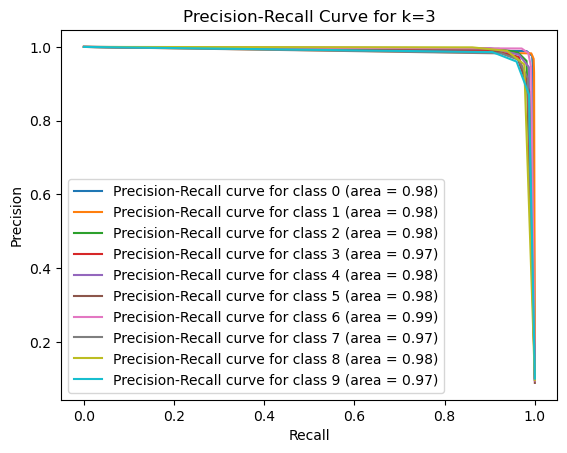

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flattening the images for k-NN
x_train_flat = x_train.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)


y_train_binarized = label_binarize(y_train, classes=[i for i in range(10)])
y_test_binarized = label_binarize(y_test, classes=[i for i in range(10)])

def evaluate_knn(k_value, X_train, y_train, X_test, y_test):
    # Initializing and train k-NN
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)
    y_pred_proba = knn.predict_proba(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for k={k_value}: {accuracy:.2f}')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for k={k_value}')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, range(10))
    plt.yticks(tick_marks, range(10))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

    # ROC Curve and AUC
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], label=f'ROC curve for class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for k={k_value}')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    precision = {}
    recall = {}
    average_precision = {}
    for i in range(10):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
        average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])
        plt.plot(recall[i], precision[i], label=f'Precision-Recall curve for class {i} (area = {average_precision[i]:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for k={k_value}')
    plt.legend(loc="lower left")
    plt.show()

evaluate_knn(3, x_train_flat, y_train, x_test_flat, y_test)
